# MODEL TRAINING (without feature selection)

In [1]:
# all the imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

import sklearn
import sklearn.linear_model
from sklearn.pipeline import make_pipeline
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestRegressor

## Data preprocessing

In [2]:
data= pd.read_csv("data_final1.csv") #loading
data

,Year,Oil brent price ($/bbl),Cononut oil ($/mt),Sugar ($/kg),Us crude oil reserves,Quantity oil embarked (million of tons),Quantity goods embarked (million of tons),Pandemic (covid),War,Electric car registrations,...,Value of Wind Consumption (EJ),Value of Nuclear Consumption (EJ),Value of Natural Gas Consumption (BcF),Population,OPEC cuts on production,Price gold,GDP Growth,Crude oil and NGL production,World-oil demand,Value of Freight Transport
0,1970.000000,1.21,405.80,0.08,39001,1207.000000,2605.00000,0,0,0,...,0.000000,0.727978,93.025514,3695380,0,34.99,3.968558,2490.52,2379.40,10172892.0
1,1970.083333,1.21,406.28,0.07,39001,1207.000000,2605.00000,0,0,0,...,0.000000,0.727978,93.025514,3695380,0,34.99,3.968558,2490.52,2379.40,10172892.0
2,1970.166667,1.21,406.28,0.07,39001,1207.000000,2605.00000,0,0,0,...,0.000000,0.727978,93.025514,3695380,0,35.20,3.968558,2490.52,2379.40,10172892.0
3,1970.250000,1.21,406.28,0.08,39001,1207.000000,2605.00000,0,0,0,...,0.000000,0.727978,93.025514,3695380,0,35.30,3.968558,2490.52,2379.40,10172892.0
4,1970.333333,1.21,399.19,0.08,39001,1207.000000,2605.00000,0,0,0,...,0.000000,0.727978,93.025514,3695380,0,35.85,3.968558,2490.52,2379.40,10172892.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2021.583333,70.02,1493.64,0.43,36385,1700.358001,10985.36591,1,0,15404930,...,17.503339,25.165261,390.634419,7909283,0,1825.75,5.869779,4296.19,4069.98,158796478.5
620,2021.666667,74.60,1485.00,0.43,36385,1700.358001,10985.36591,1,0,15404930,...,17.503339,25.165261,390.634419,7909283,0,1814.85,5.869779,4296.19,4069.98,158796478.5
621,2021.750000,83.65,1922.86,0.42,36385,1700.358001,10985.36591,1,0,15404930,...,17.503339,25.165261,390.634419,7909283,0,1742.80,5.869779,4296.19,4069.98,158796478.5
622,2021.833333,80.77,1960.68,0.43,36385,1700.358001,10985.36591,1,0,15404930,...,17.503339,25.165261,390.634419,7909283,0,1769.15,5.869779,4296.19,4069.98,158796478.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       624 non-null    float64
 1   Oil brent price ($/bbl)                    624 non-null    float64
 2   Cononut oil ($/mt)                         624 non-null    float64
 3   Sugar ($/kg)                               624 non-null    float64
 4   Us crude oil reserves                      624 non-null    int64  
 5   Quantity oil embarked (million of tons)    624 non-null    float64
 6   Quantity goods embarked (million of tons)  624 non-null    float64
 7   Pandemic (covid)                           624 non-null    int64  
 8   War                                        624 non-null    int64  
 9   Electric car registrations                 624 non-null    int64  
 10  World imports             

In [4]:
data.describe()

,Year,Oil brent price ($/bbl),Cononut oil ($/mt),Sugar ($/kg),Us crude oil reserves,Quantity oil embarked (million of tons),Quantity goods embarked (million of tons),Pandemic (covid),War,Electric car registrations,...,Value of Wind Consumption (EJ),Value of Nuclear Consumption (EJ),Value of Natural Gas Consumption (BcF),Population,OPEC cuts on production,Price gold,GDP Growth,Crude oil and NGL production,World-oil demand,Value of Freight Transport
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,6.240000e+02,...,624.000000,624.000000,624.000000,6.240000e+02,624.000000,624.000000,624.000000,624.000000,624.000000,6.240000e+02
mean,1995.958333,37.451538,743.386122,0.269103,28183.788462,1539.002240,5854.919505,0.038462,0.057692,8.424563e+05,...,2.414431,18.362341,220.820166,5.774825e+06,0.024038,599.331763,3.152875,3516.240577,3436.283654,1.337433e+08
std,15.023130,30.523005,383.579919,0.144167,5836.814615,244.727308,2715.516484,0.192462,0.233348,2.685918e+06,...,4.370277,9.076341,85.328111,1.260299e+06,0.153291,491.963383,1.631201,615.261810,583.575264,1.109539e+08
min,1970.000000,1.210000,200.000000,0.060000,19121.000000,1049.000000,2605.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.727978,93.025514,3.695380e+06,0.000000,34.990000,-3.115404,2490.520000,2379.400000,1.017289e+07
25%,1982.979167,16.052500,456.750000,0.170000,22454.250000,1356.250000,3495.750000,0.000000,0.000000,0.000000e+00,...,0.000311,9.042216,141.697022,4.670898e+06,0.000000,293.637500,2.519675,2966.917500,2959.425000,4.127752e+07
50%,1995.958333,27.510000,643.000000,0.240000,27495.500000,1594.500000,4704.500000,0.000000,0.000000,0.000000e+00,...,0.092967,23.426071,208.670411,5.784171e+06,0.000000,387.250000,3.307856,3385.230000,3314.160000,8.353648e+07
75%,2008.937500,54.635000,916.282500,0.320000,32854.250000,1741.000747,8084.055192,0.000000,0.000000,3.475000e+03,...,2.375486,25.325763,285.765447,6.833263e+06,0.000000,920.437500,4.146743,4061.740000,3991.250000,2.438308e+08
max,2021.916667,133.870000,2256.000000,1.240000,39001.000000,1881.049999,11070.533090,1.000000,1.000000,1.540493e+07,...,17.503339,27.470872,390.634419,7.909283e+06,1.000000,1964.900000,6.407434,4619.320000,4455.850000,3.381681e+08


In [5]:
data.dropna(inplace = True) # remove NaN values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       624 non-null    float64
 1   Oil brent price ($/bbl)                    624 non-null    float64
 2   Cononut oil ($/mt)                         624 non-null    float64
 3   Sugar ($/kg)                               624 non-null    float64
 4   Us crude oil reserves                      624 non-null    int64  
 5   Quantity oil embarked (million of tons)    624 non-null    float64
 6   Quantity goods embarked (million of tons)  624 non-null    float64
 7   Pandemic (covid)                           624 non-null    int64  
 8   War                                        624 non-null    int64  
 9   Electric car registrations                 624 non-null    int64  
 10  World imports             

### Manual feature selection and averaging

In [6]:
# discovered function rolling() at:
# https://stackoverflow.com/questions/60274621/calculate-average-of-specified-range-of-values-in-pandas-column-and-store-as-ano
# and function shift() at:
# https://stackoverflow.com/questions/10982089/how-to-shift-a-column-in-pandas-dataframe

# features that shouldn't ever be averaged
no_avg_features = ['Year', 'War', 'OPEC cuts on production', 'Pandemic (covid)']
# features we choose to use
features = ['Year', 'Cononut oil ($/mt)', 'Sugar ($/kg)', 'Us crude oil reserves', 
            'Quantity oil embarked (million of tons)', 'Quantity goods embarked (million of tons)', 'Pandemic (covid)', 'War', 
            'Electric car registrations', 'World imports', 'World exports', 'Value of Solar Consumption (EJ)', 'Inflation',
            'Value of Wind Consumption (EJ)', 'Value of Nuclear Consumption (EJ)', 'Value of Natural Gas Consumption (BcF)',
            'Population', 'OPEC cuts on production', 'Price gold', 'GDP Growth', 'Crude oil and NGL production', 
            'World-oil demand', 'Value of Freight Transport']

df = data.loc[:, features]

num_months_avg = 1 # over how many months to take average

take_average = 0 # 1 or 0, indicates whether we do the averaging

for feature in features:
    if feature not in no_avg_features:
        df[feature] = df[feature].rolling(num_months_avg).mean() # average
    elif num_months_avg > 1:
        df[feature] = df[feature].shift(-1) # if taking average, adjust the other features for forecasting

df.dropna(inplace=True)
df.describe()

,Year,Cononut oil ($/mt),Sugar ($/kg),Us crude oil reserves,Quantity oil embarked (million of tons),Quantity goods embarked (million of tons),Pandemic (covid),War,Electric car registrations,World imports,...,Value of Wind Consumption (EJ),Value of Nuclear Consumption (EJ),Value of Natural Gas Consumption (BcF),Population,OPEC cuts on production,Price gold,GDP Growth,Crude oil and NGL production,World-oil demand,Value of Freight Transport
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,6.240000e+02,6.240000e+02,...,624.000000,624.000000,624.000000,6.240000e+02,624.000000,624.000000,624.000000,624.000000,624.000000,6.240000e+02
mean,1995.958333,743.386122,0.269103,28183.788462,1539.002240,5854.919505,0.038462,0.057692,8.424563e+05,7.764640e+06,...,2.414431,18.362341,220.820166,5.774825e+06,0.024038,599.331763,3.152875,3516.240577,3436.283654,1.337433e+08
std,15.023130,383.579919,0.144167,5836.814615,244.727308,2715.516484,0.192462,0.233348,2.685918e+06,6.880366e+06,...,4.370277,9.076341,85.328111,1.260299e+06,0.153291,491.963383,1.631201,615.261810,583.575264,1.109539e+08
min,1970.000000,200.000000,0.060000,19121.000000,1049.000000,2605.000000,0.000000,0.000000,0.000000e+00,3.304243e+05,...,0.000000,0.727978,93.025514,3.695380e+06,0.000000,34.990000,-3.115404,2490.520000,2379.400000,1.017289e+07
25%,1982.979167,456.750000,0.170000,22454.250000,1356.250000,3495.750000,0.000000,0.000000,0.000000e+00,2.026458e+06,...,0.000311,9.042216,141.697022,4.670898e+06,0.000000,293.637500,2.519675,2966.917500,2959.425000,4.127752e+07
50%,1995.958333,643.000000,0.240000,27495.500000,1594.500000,4704.500000,0.000000,0.000000,0.000000e+00,5.365939e+06,...,0.092967,23.426071,208.670411,5.784171e+06,0.000000,387.250000,3.307856,3385.230000,3314.160000,8.353648e+07
75%,2008.937500,916.282500,0.320000,32854.250000,1741.000747,8084.055192,0.000000,0.000000,3.475000e+03,1.453177e+07,...,2.375486,25.325763,285.765447,6.833263e+06,0.000000,920.437500,4.146743,4061.740000,3991.250000,2.438308e+08
max,2021.916667,2256.000000,1.240000,39001.000000,1881.049999,11070.533090,1.000000,1.000000,1.540493e+07,2.258662e+07,...,17.503339,27.470872,390.634419,7.909283e+06,1.000000,1964.900000,6.407434,4619.320000,4455.850000,3.381681e+08


In [7]:
oil_prices = data.loc[data.Year >= 1970 + take_average*num_months_avg/12, 'Oil brent price ($/bbl)'] # labels
oil_prices

0       1.21
1       1.21
2       1.21
3       1.21
4       1.21
       ...  
619    70.02
620    74.60
621    83.65
622    80.77
623    74.31
Name: Oil brent price ($/bbl), Length: 624, dtype: float64

In [8]:
#normalization:

min_vals = df.min()
max_vals = df.max()
df = (df - min_vals) / (max_vals - min_vals)
df.describe()

,Year,Cononut oil ($/mt),Sugar ($/kg),Us crude oil reserves,Quantity oil embarked (million of tons),Quantity goods embarked (million of tons),Pandemic (covid),War,Electric car registrations,World imports,...,Value of Wind Consumption (EJ),Value of Nuclear Consumption (EJ),Value of Natural Gas Consumption (BcF),Population,OPEC cuts on production,Price gold,GDP Growth,Crude oil and NGL production,World-oil demand,Value of Freight Transport
count,624.00000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,...,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,0.50000,0.264293,0.177206,0.455875,0.588910,0.383900,0.038462,0.057692,0.054687,0.334029,...,0.137941,0.659404,0.429405,0.493472,0.024038,0.292419,0.658236,0.481830,0.508986,0.376744
std,0.28937,0.186566,0.122175,0.293602,0.294126,0.320773,0.192462,0.233348,0.174354,0.309144,...,0.249682,0.339393,0.286712,0.299081,0.153291,0.254915,0.171294,0.289018,0.281045,0.338279
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.25000,0.124878,0.093220,0.167669,0.369269,0.105221,0.000000,0.000000,0.000000,0.076205,...,0.000018,0.310895,0.163542,0.231500,0.000000,0.134020,0.591744,0.223787,0.279335,0.094833
50%,0.50000,0.215467,0.152542,0.421253,0.655610,0.248006,0.000000,0.000000,0.000000,0.226252,...,0.005311,0.848752,0.388580,0.495690,0.000000,0.182527,0.674511,0.420288,0.450172,0.223673
75%,0.75000,0.348386,0.220339,0.690807,0.831682,0.647219,0.000000,0.000000,0.000226,0.638085,...,0.135716,0.919788,0.647628,0.744650,0.000000,0.458802,0.762603,0.738078,0.776253,0.712382
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# transform the normalized values back into years
def years_transform(y):
    return y * (max_vals['Year'] - min_vals['Year']) + min_vals['Year']

## The training

In [10]:
# split the data into training and testing sets:
x_train, x_test, y_train, y_test = train_test_split(df, oil_prices, test_size=0.3, shuffle=True)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

436
436
188
188


In [11]:
model_results = dict() # store the results in the form 
                       # <model> : (<r2_score>, <mse>, <mse_cross_validation>)

### Cross-validation function

In [12]:
"""def cross_validation(model, X, y, cv = 10):
    scores = []
    n = len(X)
    for i in range(cv):
        x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size = 0.1, shuffle = True)
        model.fit(x_train_set, y_train_set)
        scores.append(model.score(x_test_set, y_test_set))
    return np.mean(scores)"""
def cross_validate(model, x, y, n, score_fn, agg_fn, stratified):
    if stratified:
        kf = StratifiedKFold(n_splits=n)
    else:
        kf = KFold(n_splits=n)

    scores = []
    for train_idx, test_idx in kf.split(x, y):
        X_train, Y_train = x.iloc[train_idx], y.iloc[train_idx]
        X_test, Y_test = x.iloc[test_idx], y.iloc[test_idx]
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        score = score_fn(Y_test, y_pred)
        scores.append(score)
    return agg_fn(scores)

## Linear regression model

In [13]:
linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(x_train, y_train)
y_predict_linear = linear_model.predict(x_test)
linear_r2_score = r2_score(y_test, y_predict_linear)
linear_mse = mean_squared_error(y_test, y_predict_linear)
linear_cv = cross_validate(linear_model, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("linear regression r2 score: ", linear_r2_score)
print("linear regression mse: ", linear_mse)
print("linear regression cros-validation score: ", linear_cv)
model_results["linear_regression"] = (linear_r2_score, linear_mse, linear_cv)

linear regression r2 score:  0.9361874946807662
linear regression mse:  57.938298304294435
linear regression cros-validation score:  1308536400.380788


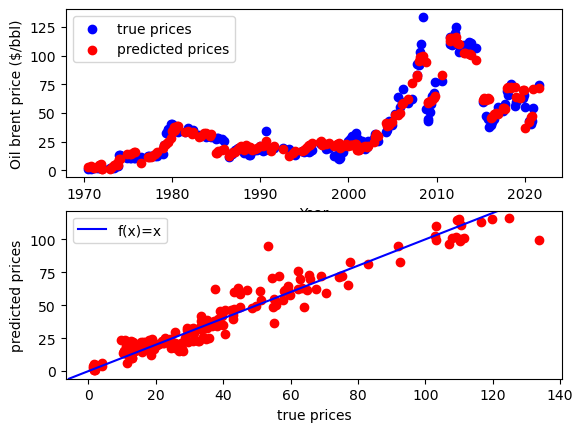

In [14]:
# plot the results of the linear model
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_linear, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_linear, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

## Linear regression with Ridge penalty

In [15]:
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 50, 100, 200] # try all of these values for alpha
alpha_ridge = 1
best_score_ridge = 0

for alpha in alphas:
    #ridge_model = sklearn.linear_model.Ridge(alpha=0.5, normalize = True)
    linear_ridge_model = make_pipeline(StandardScaler(with_mean=False), sklearn.linear_model.Ridge(alpha=alpha))
    score = cross_validate(linear_ridge_model, x_train, y_train, 10, r2_score, np.mean, False)
    if score > best_score_ridge:
        best_score_ridge = score
        alpha_ridge = alpha

linear_ridge_model = make_pipeline(StandardScaler(with_mean=False), sklearn.linear_model.Ridge(alpha=alpha_ridge))
linear_ridge_model.fit(x_train, y_train)
y_predict_linear_ridge = linear_ridge_model.predict(x_test)
linear_ridge_r2_score = r2_score(y_test, y_predict_linear_ridge)
linear_ridge_mse = mean_squared_error(y_test, y_predict_linear_ridge)
linear_ridge_cv = cross_validate(linear_ridge_model, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("optimal alpha: ", alpha_ridge)
print("r2 score: ", linear_ridge_r2_score)
print("mse: ", linear_ridge_mse)
print("cross-validation: ", linear_ridge_cv)
model_results["linear_ridge"] = (linear_ridge_r2_score, linear_ridge_mse, linear_ridge_cv)

optimal alpha:  0.01
r2 score:  0.9359970842441161
mse:  58.11118066682978
cross-validation:  67234304.81083053


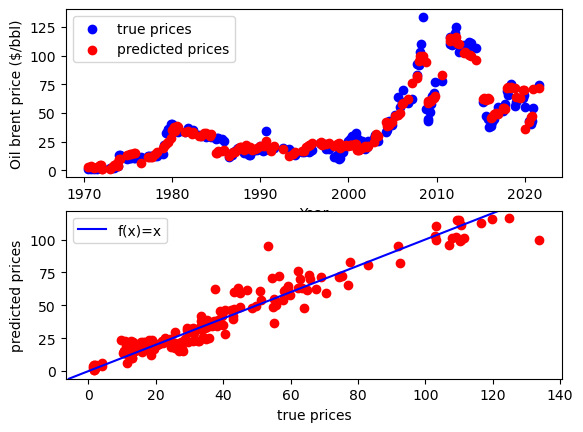

In [16]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_linear_ridge, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_linear_ridge, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

## Linear regression with Lasso penalty

In [17]:
alphas = [0.1, 0.5, 1, 5, 10, 20, 50, 100, 200]
alpha_lasso = 1
best_score_lasso = 0

for alpha in alphas:
    linear_lasso_model = make_pipeline(StandardScaler(with_mean=False), sklearn.linear_model.Lasso(alpha=alpha))
    score = cross_validate(linear_lasso_model, x_train, y_train, 10, r2_score, np.mean, False)
    if score > best_score_lasso:
        best_score_lasso = score
        alpha_lasso = alpha

linear_lasso_model = make_pipeline(StandardScaler(with_mean=False), sklearn.linear_model.Lasso(alpha=alpha_lasso))
linear_lasso_model.fit(x_train, y_train)
y_predict_linear_lasso = linear_lasso_model.predict(x_test)
linear_lasso_r2_score = r2_score(y_test, y_predict_linear_lasso)
linear_lasso_mse = mean_squared_error(y_test, y_predict_linear_lasso)
linear_lasso_cv = cross_validate(linear_lasso_model, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("optimal alpha: ", alpha_lasso)
print("r2 score: ", linear_lasso_r2_score)
print("mse: ", linear_lasso_mse)
print("cv: ", linear_lasso_cv)
model_results["linear_lasso"] = (linear_lasso_r2_score, linear_lasso_mse, linear_lasso_cv)

C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.291e+01, tolerance: 3.812e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.398e+01, tolerance: 3.537e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.472e+01, toleranc

optimal alpha:  0.1
r2 score:  0.9192127144482721
mse:  73.35047928418226
cv:  2546211.101777478


C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.453e+02, tolerance: 4.542e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.578e+01, tolerance: 5.150e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.248e+02, toleranc

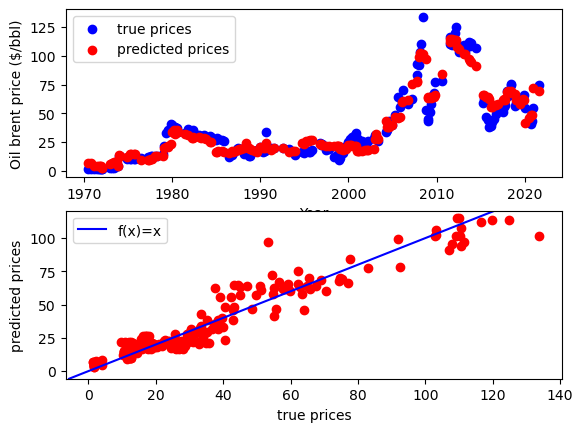

In [18]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_linear_lasso, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_linear_lasso, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

## Polynomial regression

In [19]:
polynomial_features = sklearn.preprocessing.PolynomialFeatures(degree= 2) # results are generally bad, but degree 2 seems to work
linear_regression = sklearn.linear_model.LinearRegression(fit_intercept=False)
polynomial_model = sklearn.pipeline.Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
polynomial_model.fit(x_train, y_train)
y_predict_polynomial = polynomial_model.predict(x_test)
polynomial_r2_score = r2_score(y_test, y_predict_polynomial)
polynomial_mse = mean_squared_error(y_test, y_predict_polynomial)
polynomial_cv = cross_validate(polynomial_model, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("r2 score: ", polynomial_r2_score)
print("mse: ", polynomial_mse)
print("cv: ", polynomial_cv)
model_results["polynomial"] = (polynomial_r2_score, polynomial_mse, polynomial_cv)

r2 score:  0.894844984516612
mse:  95.47505813774859
cv:  4.681250740188116e+23


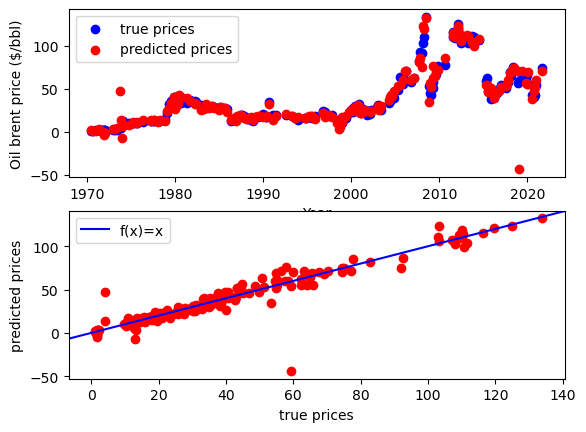

In [20]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_polynomial, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_polynomial, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

## Polynomial regression with Ridge penalty

In [21]:
degrees = [2, 3, 4] # try these degrees
alphas = [0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100, 200] # try for these values of alpha
alpha_ridge = 1
degree_ridge = 1
best_score_ridge = 0
for d in degrees:
    for alpha in alphas:
        polynomial_features_ridge = sklearn.preprocessing.PolynomialFeatures(degree= d)
        linear_regression_ridge = sklearn.linear_model.Ridge(alpha = alpha, fit_intercept=False)
        polynomial_model_ridge = sklearn.pipeline.Pipeline([("polynomial_features", polynomial_features_ridge), ("linear_regression", linear_regression_ridge)])
        score = cross_validate(polynomial_model_ridge, x_train, y_train, 10, r2_score, np.mean, False)
        if score > best_score_ridge:
            best_score_ridge = score
            alpha_ridge = alpha
            degree_ridge = d
            
polynomial_features_ridge = sklearn.preprocessing.PolynomialFeatures(degree= degree_ridge)
linear_regression_ridge = sklearn.linear_model.Ridge(alpha = alpha_ridge, fit_intercept=False)
polynomial_model_ridge = sklearn.pipeline.Pipeline([("polynomial_features", polynomial_features_ridge), ("linear_regression", linear_regression_ridge)])
polynomial_model_ridge.fit(x_train, y_train)
y_predict_polynomial_ridge = polynomial_model_ridge.predict(x_test)
polynomial_ridge_r2_score = r2_score(y_test, y_predict_polynomial_ridge)
polynomial_ridge_mse = mean_squared_error(y_test, y_predict_polynomial_ridge)
polynomial_ridge_cv = cross_validate(polynomial_model_ridge, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("optimal degree: ", degree_ridge)
print("optimal alpha: ", alpha_ridge)
print("r2 score: ", polynomial_ridge_r2_score)
print("mse: ", polynomial_ridge_mse)
print("cv: ", polynomial_ridge_cv)
model_results["polynomial_ridge"] = (polynomial_ridge_r2_score, polynomial_ridge_mse, polynomial_ridge_cv)

optimal degree:  4
optimal alpha:  0.05
r2 score:  0.9762947996355764
mse:  21.52303789368814
cv:  6762.762089856493


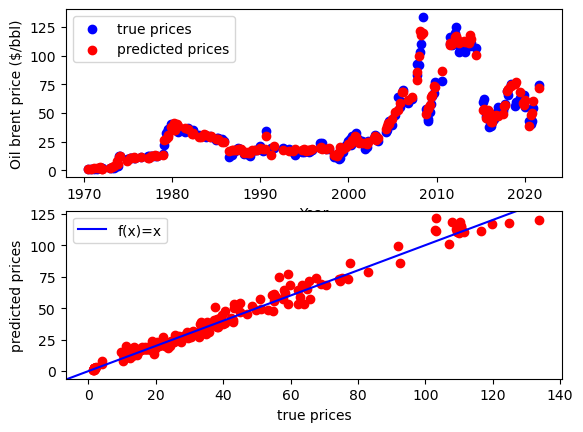

In [22]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_polynomial_ridge, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_polynomial_ridge, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

## Polynomial regression with Lasso penalty:

In [23]:
degrees = [2, 3, 4] # try polynomials of these degrees
alphas = [0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100, 200] # try these values of alpha
alpha_lasso = 1
degree_lasso = 1
best_score_lasso = 0
for d in degrees:
    for alpha in alphas:
        polynomial_features_lasso = sklearn.preprocessing.PolynomialFeatures(degree= d)
        linear_regression_lasso = sklearn.linear_model.Lasso(alpha = alpha, fit_intercept=False)
        polynomial_model_lasso = sklearn.pipeline.Pipeline([("polynomial_features", polynomial_features_lasso), ("linear_regression", linear_regression_lasso)])
        score = cross_validate(polynomial_model_lasso, x_train, y_train, 10, r2_score, np.mean, False)
        if score > best_score_lasso:
            best_score_lasso = score
            alpha_lasso = alpha
            degree_lasso = d
            
polynomial_features_lasso = sklearn.preprocessing.PolynomialFeatures(degree= degree_lasso) # all the results seem to be bad
linear_regression_lasso = sklearn.linear_model.Lasso(alpha = alpha_lasso, fit_intercept=False)
polynomial_model_lasso = sklearn.pipeline.Pipeline([("polynomial_features", polynomial_features_lasso), ("linear_regression", linear_regression_lasso)])
polynomial_model_lasso.fit(x_train, y_train)
y_predict_polynomial_lasso = polynomial_model_lasso.predict(x_test)
polynomial_lasso_r2_score = r2_score(y_test, y_predict_polynomial_lasso)
polynomial_lasso_mse = mean_squared_error(y_test, y_predict_polynomial_lasso)
polynomial_lasso_cv = cross_validate(polynomial_model_lasso, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("optimal degree: ", degree_lasso)
print("optimal alpha: ", alpha_lasso)
print("r2 score: ", polynomial_lasso_r2_score)
print("mse: ", polynomial_lasso_mse)
print("cv: ", polynomial_lasso_cv)
model_results["polynomial_lasso"] = (polynomial_lasso_r2_score, polynomial_lasso_mse, polynomial_lasso_cv)

C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.491e+03, tolerance: 9.345e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.091e+03, tolerance: 8.670e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.078e+03, toleranc

C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.146e+02, tolerance: 8.900e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.202e+03, tolerance: 9.345e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.131e+03, toleranc

C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.095e+03, tolerance: 9.480e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.211e+03, tolerance: 9.462e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.545e+03, toleranc

C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.058e+02, tolerance: 9.345e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.986e+02, tolerance: 8.670e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.069e+02, toleranc

C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.314e+03, tolerance: 9.184e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.566e+03, tolerance: 8.900e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.383e+03, toleranc

C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.212e+02, tolerance: 9.248e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.453e+02, tolerance: 9.270e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.326e+02, toleranc

optimal degree:  4
optimal alpha:  0.005
r2 score:  0.967417781600923
mse:  29.582889428608727
cv:  2343.74914969669


C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.349e+03, tolerance: 4.831e+01
  model = cd_fast.enet_coordinate_descent(


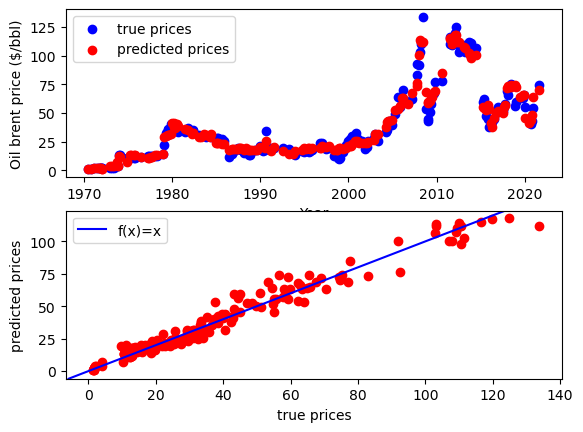

In [24]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_polynomial_lasso, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_polynomial_lasso, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

## Decision trees

### Bagging regressor

In [25]:
# different hyper-parameters to try
depths = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
estimators = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50] 
samples_features = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
min_mse = math.inf
max_depth = 0
num_estimators = 0
max_samples_features = 0

for d in depths:
     for e in estimators:
            for sf in samples_features:
                bagging_model = BaggingRegressor(DecisionTreeRegressor(max_depth=d),n_estimators=e, max_samples=sf, max_features=sf)
                bagging_model.fit(x_train, y_train)
                prediction = bagging_model.predict(x_test)
                mse = mean_squared_error(prediction, y_test)
                if mse<min_mse:
                    min_mse = mse
                    max_depth = d
                    num_estimators = e
                    max_samples_features = sf
bagging_model = BaggingRegressor(DecisionTreeRegressor(max_depth=max_depth),n_estimators=num_estimators, max_samples=max_samples_features, max_features=max_samples_features)
bagging_model.fit(x_train, y_train)
y_predict_bagging = bagging_model.predict(x_test)
bagging_r2_score = r2_score(y_test, y_predict_bagging)
bagging_mse = mean_squared_error(y_test, y_predict_bagging)
bagging_cv = cross_validate(bagging_model, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("max_depth: ", max_depth)
print("num_estimators: ", num_estimators)
print("max_samples: ", max_samples_features)
print("max_features: ", max_samples_features)
print("mse: ", bagging_mse)
print("r2 score: ", bagging_r2_score)
print("cv: ", bagging_cv)
model_results["bagging"] = (bagging_r2_score, bagging_mse, bagging_cv)

max_depth:  20
num_estimators:  30
max_samples:  0.9
max_features:  0.9
mse:  22.666479993730352
r2 score:  0.975035427040476
cv:  640.6171660665955


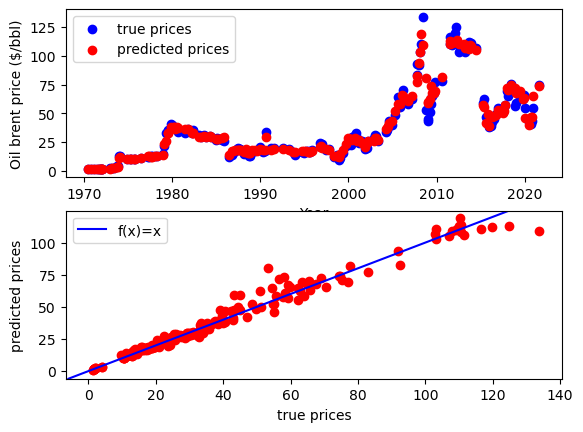

In [26]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_bagging, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_bagging, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

### AdaBoost

In [27]:
# tuning the hyper-parameters:
depths = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
estimators = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
min_mse = math.inf
max_depth = 0
num_estimators = 0

for d in depths:
     for e in estimators:
            for sf in samples_features:
                adaboost_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=d),n_estimators=e)
                adaboost_model.fit(x_train, y_train)
                prediction = adaboost_model.predict(x_test)
                mse = mean_squared_error(prediction, y_test)
                if mse<min_mse:
                    min_mse = mse
                    max_depth = d
                    num_estimators = e
                    max_samples_features = sf
adaboost_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=max_depth),n_estimators=num_estimators)
adaboost_model.fit(x_train, y_train)
y_predict_adaboost = adaboost_model.predict(x_test)
adaboost_r2_score = r2_score(y_test, y_predict_adaboost)
adaboost_mse = mean_squared_error(y_test, y_predict_adaboost)
adaboost_cv = cross_validate(adaboost_model, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("max_depth: ", max_depth)
print("num_estimators: ", num_estimators)
print("mse: ", adaboost_mse)
print("r2 score: ", adaboost_r2_score)
print("cv: ", adaboost_cv)
model_results["adaboost"] = (adaboost_r2_score, adaboost_mse, adaboost_cv)

max_depth:  40
num_estimators:  40
mse:  15.492112234042551
r2 score:  0.9829371845001577
cv:  713.3105756410255


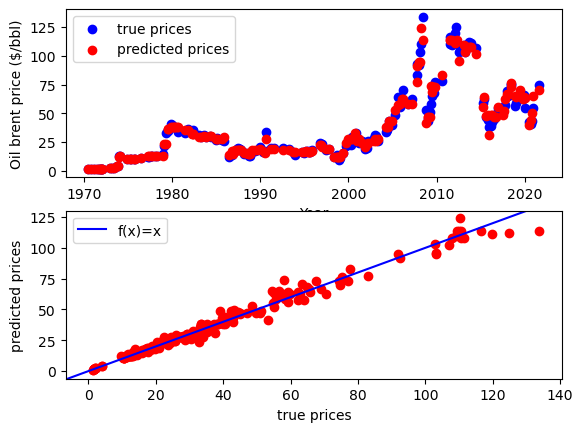

In [28]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_adaboost, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_adaboost, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

### Gradient Boosting regressor

In [29]:
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)
y_predict_gb = gb_model.predict(x_test)
gb_r2_score = r2_score(y_test, y_predict_gb)
gb_mse = mean_squared_error(y_test, y_predict_gb)
gb_cv = cross_validate(gb_model, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("r2 score: ", gb_r2_score)
print("mse: ", gb_mse)
print("cross_validation: ", gb_cv)
model_results["gradient_boosting"] = (gb_r2_score, gb_mse, gb_cv)

r2 score:  0.9715275884435935
mse:  25.851407430958524
cross_validation:  620.1353779207891


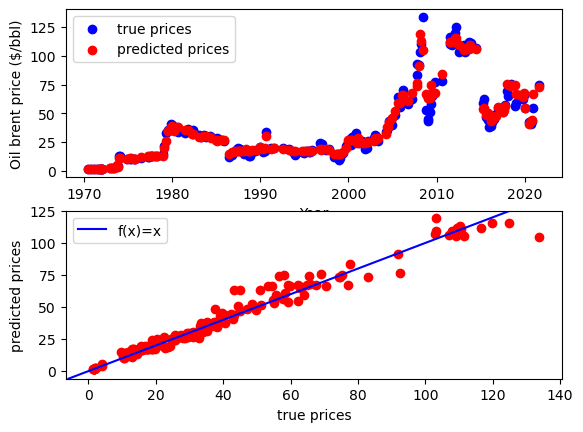

In [30]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_gb, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_gb, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

### Extreme Gradient Boosting Regressor

In [31]:
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)
y_predict_xgb = xgb_model.predict(x_test)
xgb_r2_score = r2_score(y_test, y_predict_xgb)
xgb_mse = mean_squared_error(y_test, y_predict_xgb)
xgb_cv = cross_validate(xgb_model, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("r2 score: ", xgb_r2_score)
print("mse: ", xgb_mse)
print("cross-validation score: ", xgb_cv)
model_results["xgb_regressor"] = (xgb_r2_score, xgb_mse, xgb_cv)

r2 score:  0.9698048834023651
mse:  27.415530294802856
cross-validation score:  621.124659375191


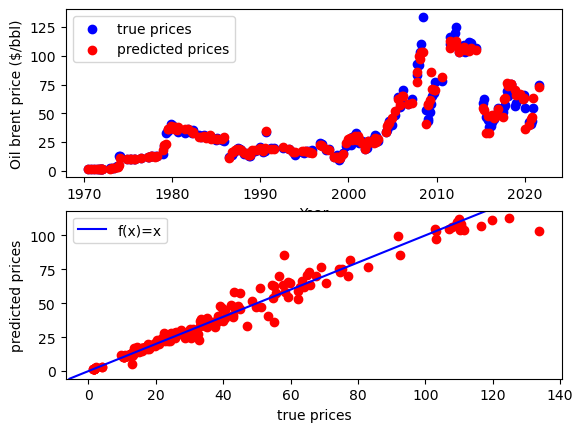

In [32]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_xgb, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_xgb, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

### Random forest

In [33]:
forest = RandomForestRegressor()
forest.fit(x_train, y_train)
y_predict_forest = forest.predict(x_test)
forest_r2_score = r2_score(y_test, y_predict_forest)
forest_mse = mean_squared_error(y_test, y_predict_forest)
forest_cv = cross_validate(forest, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("r2 score: ", forest_r2_score)
print("mse: ", forest_mse)
print("cross-validation score: ", forest_cv)
model_results["random_forest"] = (forest_r2_score, forest_mse, forest_cv)

r2 score:  0.9775000018764277
mse:  20.42877954106389
cross-validation score:  698.034808000225


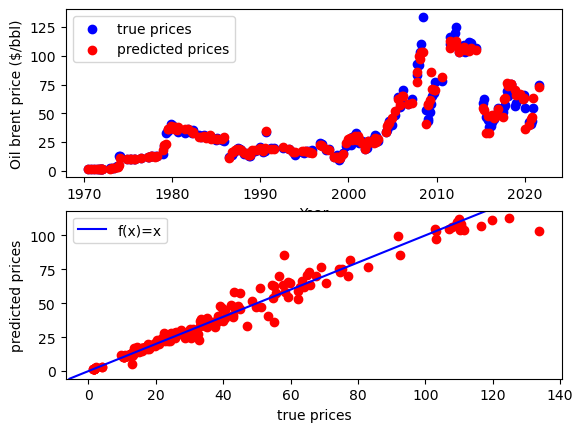

In [34]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_xgb, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_xgb, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

## Summing up the results

In [35]:
comparison_r2 = sorted(model_results.items(), key = lambda x:x[1], reverse = True)
print(comparison_r2)

[('adaboost', (0.9829371845001577, 15.492112234042551, 713.3105756410255)), ('random_forest', (0.9775000018764277, 20.42877954106389, 698.034808000225)), ('polynomial_ridge', (0.9762947996355764, 21.52303789368814, 6762.762089856493)), ('bagging', (0.975035427040476, 22.666479993730352, 640.6171660665955)), ('gradient_boosting', (0.9715275884435935, 25.851407430958524, 620.1353779207891)), ('xgb_regressor', (0.9698048834023651, 27.415530294802856, 621.124659375191)), ('polynomial_lasso', (0.967417781600923, 29.582889428608727, 2343.74914969669)), ('linear_regression', (0.9361874946807662, 57.938298304294435, 1308536400.380788)), ('linear_ridge', (0.9359970842441161, 58.11118066682978, 67234304.81083053)), ('linear_lasso', (0.9192127144482721, 73.35047928418226, 2546211.101777478)), ('polynomial', (0.894844984516612, 95.47505813774859, 4.681250740188116e+23))]


In [36]:
comparison_mse = sorted(model_results.items(), key = lambda x:(x[1][1], x[1][0], x[1][2]))
print(comparison_mse)

[('adaboost', (0.9829371845001577, 15.492112234042551, 713.3105756410255)), ('random_forest', (0.9775000018764277, 20.42877954106389, 698.034808000225)), ('polynomial_ridge', (0.9762947996355764, 21.52303789368814, 6762.762089856493)), ('bagging', (0.975035427040476, 22.666479993730352, 640.6171660665955)), ('gradient_boosting', (0.9715275884435935, 25.851407430958524, 620.1353779207891)), ('xgb_regressor', (0.9698048834023651, 27.415530294802856, 621.124659375191)), ('polynomial_lasso', (0.967417781600923, 29.582889428608727, 2343.74914969669)), ('linear_regression', (0.9361874946807662, 57.938298304294435, 1308536400.380788)), ('linear_ridge', (0.9359970842441161, 58.11118066682978, 67234304.81083053)), ('linear_lasso', (0.9192127144482721, 73.35047928418226, 2546211.101777478)), ('polynomial', (0.894844984516612, 95.47505813774859, 4.681250740188116e+23))]


In [37]:
comparison_cv = sorted(model_results.items(), key = lambda x:(x[1][2], x[1][0], x[1][1]))
print(comparison_cv)

[('gradient_boosting', (0.9715275884435935, 25.851407430958524, 620.1353779207891)), ('xgb_regressor', (0.9698048834023651, 27.415530294802856, 621.124659375191)), ('bagging', (0.975035427040476, 22.666479993730352, 640.6171660665955)), ('random_forest', (0.9775000018764277, 20.42877954106389, 698.034808000225)), ('adaboost', (0.9829371845001577, 15.492112234042551, 713.3105756410255)), ('polynomial_lasso', (0.967417781600923, 29.582889428608727, 2343.74914969669)), ('polynomial_ridge', (0.9762947996355764, 21.52303789368814, 6762.762089856493)), ('linear_lasso', (0.9192127144482721, 73.35047928418226, 2546211.101777478)), ('linear_ridge', (0.9359970842441161, 58.11118066682978, 67234304.81083053)), ('linear_regression', (0.9361874946807662, 57.938298304294435, 1308536400.380788)), ('polynomial', (0.894844984516612, 95.47505813774859, 4.681250740188116e+23))]


After several runs with different selected features and averaging strategies, the decision trees seem to be a good choice for a fast oil price prediction.